# Data Preprocessing


In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt


In [24]:
df = pd.read_csv('food-nutrition.csv')
df

,name,calories,fat,proteins,carbohydrate,Meal Type
0,chocolate pudding fat free,105.0,0.3,2.2,23.6,Drink
1,tapioca pudding,143.0,4.3,2.1,23.9,Snack
2,tapioca pudding fat free,105.0,0.4,1.6,23.9,Snack
3,rice pudding,122.0,2.4,3.6,20.8,Carbs
4,corn pudding,328.0,12.6,11.1,42.4,Carbs
...,...,...,...,...,...,...
2269,muesli master crumble,124.0,2.4,2.4,4.5,Drink
2270,bran flakes,131.0,0.8,4.0,32.2,Drink
2271,nut cereal,245.0,5.9,4.0,46.2,Carbs
2272,corn flakes,108.0,0.3,1.7,24.6,Drink


In [25]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2274 non-null   object 
 1   calories      2274 non-null   float64
 2   fat           2274 non-null   float64
 3   proteins      2274 non-null   float64
 4   carbohydrate  2274 non-null   float64
 5   Meal Type     2274 non-null   object 
dtypes: float64(4), object(2)
memory usage: 106.7+ KB
None
                         name  calories   fat  proteins  carbohydrate  \
0  chocolate pudding fat free     105.0   0.3       2.2          23.6   
1             tapioca pudding     143.0   4.3       2.1          23.9   
2    tapioca pudding fat free     105.0   0.4       1.6          23.9   
3                rice pudding     122.0   2.4       3.6          20.8   
4                corn pudding     328.0  12.6      11.1          42.4   

  Meal Type  
0     Drink  
1     Snack  
2     Snac

In [26]:
print(df.isnull().sum())

name            0
calories        0
fat             0
proteins        0
carbohydrate    0
Meal Type       0
dtype: int64


In [27]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 695


In [28]:
df = df.drop_duplicates()
print(f"Data after removing duplicates: {df.shape}")

Data after removing duplicates: (1579, 6)


In [29]:
scaler = MinMaxScaler()
df[['calories', 'fat', 'proteins', 'carbohydrate']] = scaler.fit_transform(df[['calories', 'fat', 'proteins', 'carbohydrate']])

<ipython-input-29-3ad75d7d7975>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['calories', 'fat', 'proteins', 'carbohydrate']] = scaler.fit_transform(df[['calories', 'fat', 'proteins', 'carbohydrate']])


In [30]:
df = df[df["Meal Type"] != "ingrideint"]

In [31]:
label_encoder = LabelEncoder()
df['Meal Type'] = label_encoder.fit_transform(df['Meal Type'])

<ipython-input-31-59bc03aeb670>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Meal Type'] = label_encoder.fit_transform(df['Meal Type'])


In [32]:
meal_type_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(meal_type_mapping)

{'Breakfast': np.int64(0), 'Carbs': np.int64(1), 'Drink': np.int64(2), 'Lunch/Dinner': np.int64(3), 'Snack': np.int64(4)}


In [33]:
carb_median = df["carbohydrate"].median()
protein_median = df["proteins"].median()

df["Carb_Level"] = df["carbohydrate"].apply(lambda x: "High-Carb" if x >= carb_median else "Low-Carb")
df["Protein_Level"] = df["proteins"].apply(lambda x: "High-Protein" if x >= protein_median else "Low-Protein")

print(df.head())

                         name  calories    fat  proteins  carbohydrate  \
0  chocolate pudding fat free  0.103960  0.003  0.012571      0.036476   
1             tapioca pudding  0.141584  0.043  0.012000      0.036940   
2    tapioca pudding fat free  0.103960  0.004  0.009143      0.036940   
3                rice pudding  0.120792  0.024  0.020571      0.032148   
4                corn pudding  0.324752  0.126  0.063429      0.065533   

   Meal Type Carb_Level Protein_Level  
0          2  High-Carb   Low-Protein  
1          4  High-Carb   Low-Protein  
2          4  High-Carb   Low-Protein  
3          1  High-Carb   Low-Protein  
4          1  High-Carb  High-Protein  


<ipython-input-33-6b770f8ff086>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Carb_Level"] = df["carbohydrate"].apply(lambda x: "High-Carb" if x >= carb_median else "Low-Carb")
<ipython-input-33-6b770f8ff086>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Protein_Level"] = df["proteins"].apply(lambda x: "High-Protein" if x >= protein_median else "Low-Protein")


In [34]:
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
Index: 1117 entries, 0 to 1807
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1117 non-null   object 
 1   calories       1117 non-null   float64
 2   fat            1117 non-null   float64
 3   proteins       1117 non-null   float64
 4   carbohydrate   1117 non-null   float64
 5   Meal Type      1117 non-null   int64  
 6   Carb_Level     1117 non-null   object 
 7   Protein_Level  1117 non-null   object 
dtypes: float64(4), int64(1), object(3)
memory usage: 78.5+ KB
None


,name,calories,fat,proteins,carbohydrate,Meal Type,Carb_Level,Protein_Level
0,chocolate pudding fat free,0.103960,0.003,0.012571,0.036476,2,High-Carb,Low-Protein
1,tapioca pudding,0.141584,0.043,0.012000,0.036940,4,High-Carb,Low-Protein
2,tapioca pudding fat free,0.103960,0.004,0.009143,0.036940,4,High-Carb,Low-Protein
3,rice pudding,0.120792,0.024,0.020571,0.032148,1,High-Carb,Low-Protein
4,corn pudding,0.324752,0.126,0.063429,0.065533,1,High-Carb,High-Protein
...,...,...,...,...,...,...,...,...
1803,Woku ubi,0.141584,0.078,0.017714,0.023184,1,Low-Carb,Low-Protein
1804,Worst (sosis daging),0.447525,0.423,0.082857,0.003555,3,Low-Carb,High-Protein
1805,Wortel Segar,0.041584,0.006,0.006857,0.014374,4,Low-Carb,Low-Protein
1806,Wortel kukus,0.036634,0.006,0.005714,0.012828,4,Low-Carb,Low-Protein


Rekomendasi makanan berdasarkan kepadatan nutrisi

In [35]:
df["Nutrient_Density"] = (df["proteins"] + df["carbohydrate"] - df["fat"]) / (df["calories"] + 1e-6)
df = df.sort_values(by="Nutrient_Density", ascending=False)

<ipython-input-35-eba931d4eb95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Nutrient_Density"] = (df["proteins"] + df["carbohydrate"] - df["fat"]) / (df["calories"] + 1e-6)


In [36]:
df[["name", "calories", "proteins", "carbohydrate", "fat", "Nutrient_Density", "Meal Type"]].head(10)

,name,calories,proteins,carbohydrate,fat,Nutrient_Density,Meal Type
52,coffee decaffeinated,0.000000,0.001143,0.000000,0.000,1142.857143,2
913,Ikan Gabus segar,0.073267,0.144000,0.000000,0.017,1.733355,3
1672,Teh,0.130693,0.111429,0.104791,0.007,1.600837,2
1184,Kerbau daging segar,0.078218,0.106857,0.000000,0.005,1.302208,3
924,Ikan kayu kering,0.299010,0.404000,0.000618,0.019,1.289646,3
1680,Telur Ayam bagian putih,0.049505,0.061714,0.001236,0.000,1.271580,3
983,Ikan Teri Nasi kering,0.142574,0.185714,0.000000,0.006,1.260487,1
693,Daging Kerbau,0.083168,0.106857,0.000000,0.005,1.224696,3
897,Ikan Beunteur,0.065347,0.080000,0.000000,0.000,1.224224,3
986,Ikan titang segar,0.081188,0.099429,0.003555,0.004,1.219171,3


In [37]:
df = df[df["calories"] > 0]

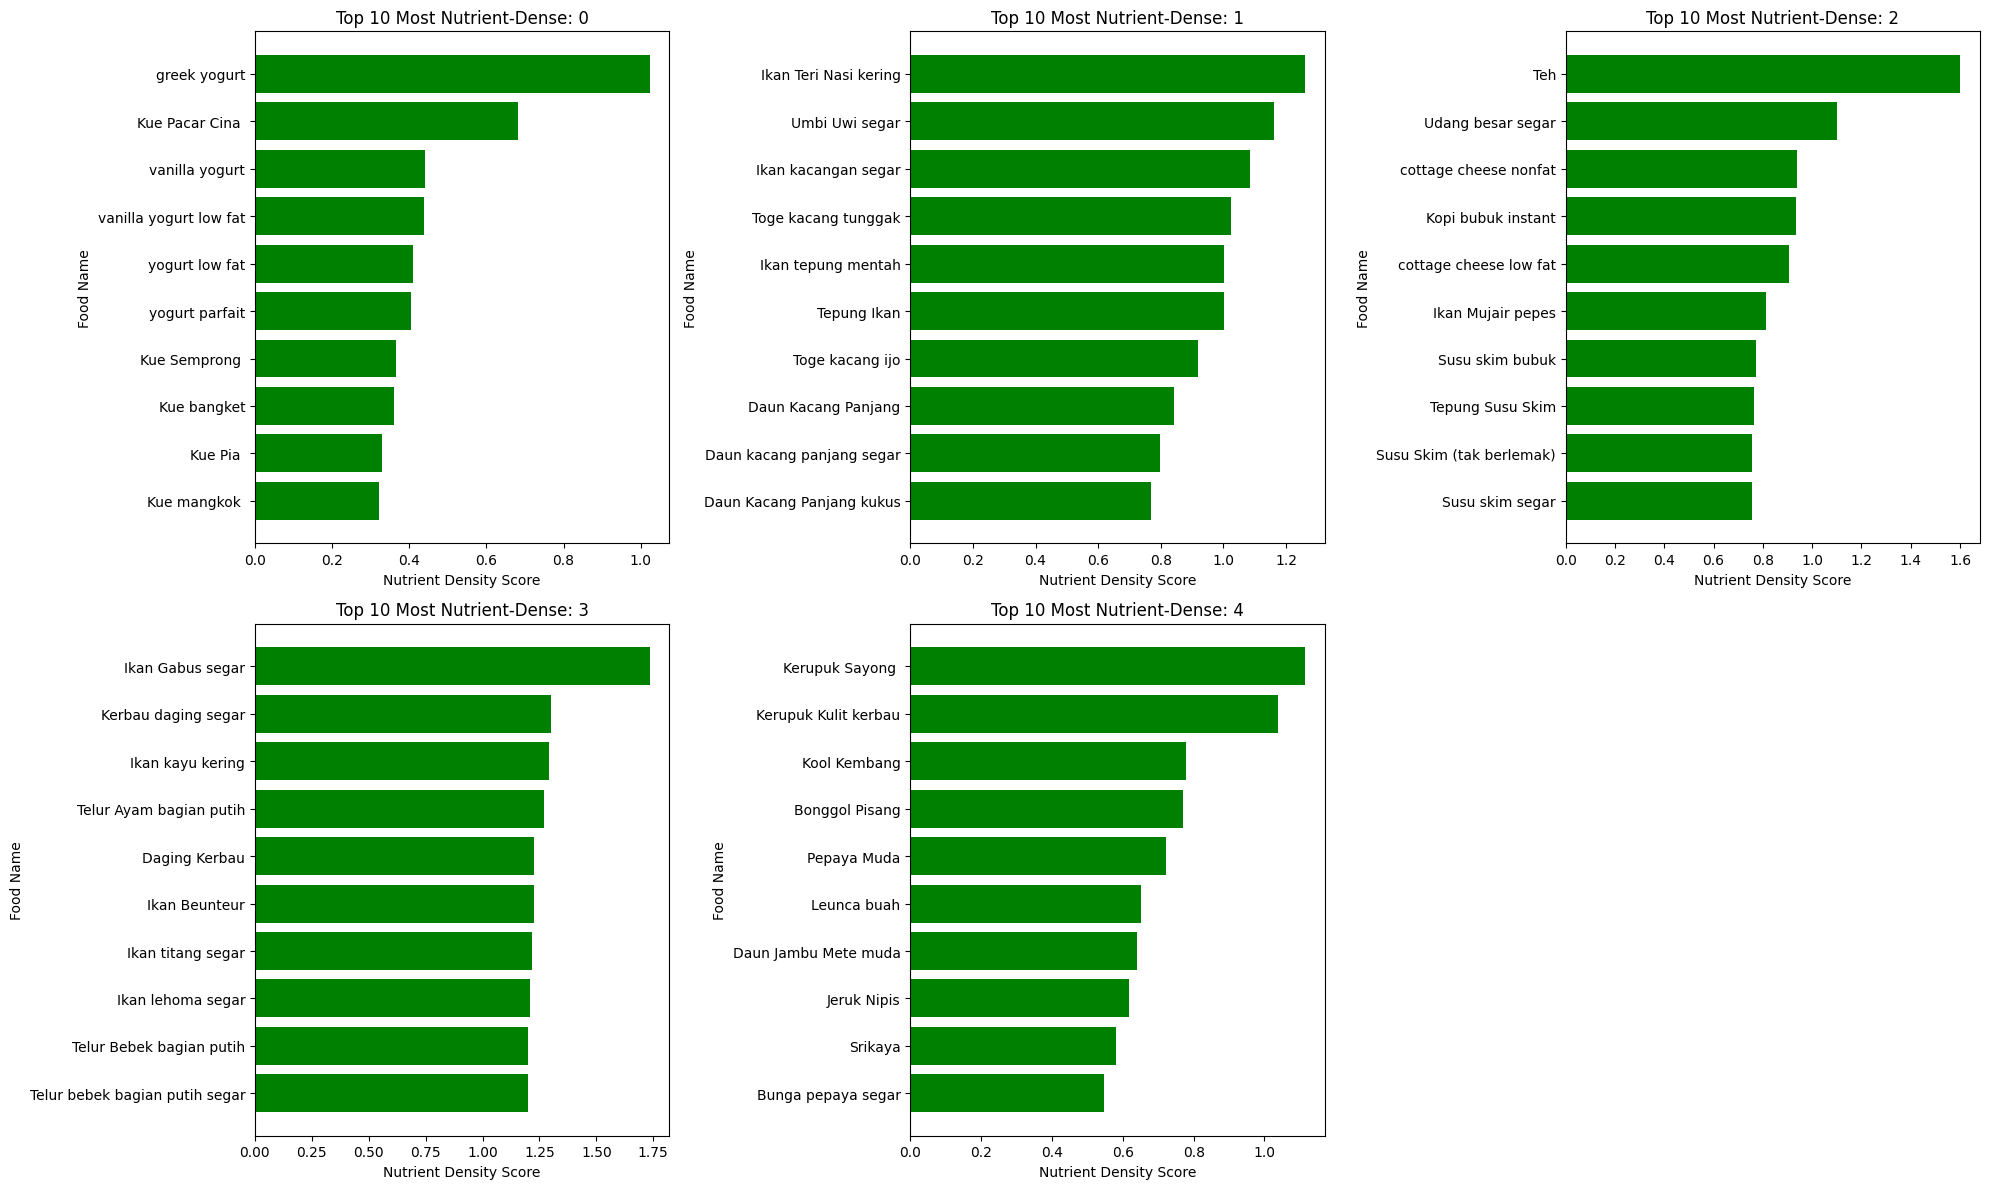

In [38]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

meal_types = df["Meal Type"].unique()

for i, (meal_type, group) in enumerate(df.groupby("Meal Type")):
    top_10 = group.sort_values(by="Nutrient_Density", ascending=False).head(10)

    axes[i].barh(top_10["name"], top_10["Nutrient_Density"], color="green")
    axes[i].set_xlabel("Nutrient Density Score")
    axes[i].set_ylabel("Food Name")
    axes[i].set_title(f"Top 10 Most Nutrient-Dense: {meal_type}")
    axes[i].invert_yaxis()

for j in range(len(meal_types), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [39]:
df

,name,calories,fat,proteins,carbohydrate,Meal Type,Carb_Level,Protein_Level,Nutrient_Density
913,Ikan Gabus segar,0.073267,0.017,0.144000,0.000000,3,Low-Carb,High-Protein,1.733355
1672,Teh,0.130693,0.007,0.111429,0.104791,2,High-Carb,High-Protein,1.600837
1184,Kerbau daging segar,0.078218,0.005,0.106857,0.000000,3,Low-Carb,High-Protein,1.302208
924,Ikan kayu kering,0.299010,0.019,0.404000,0.000618,3,Low-Carb,High-Protein,1.289646
1680,Telur Ayam bagian putih,0.049505,0.000,0.061714,0.001236,3,Low-Carb,High-Protein,1.271580
...,...,...,...,...,...,...,...,...,...
1372,Minyak Zaitun,0.875248,1.000,0.000000,0.000000,3,Low-Carb,Low-Protein,-1.142533
1368,Minyak kedelai,0.874257,0.999,0.000000,0.000000,3,Low-Carb,Low-Protein,-1.142683
1445,Pepaya segar,0.045545,0.120,0.002857,0.018856,4,Low-Carb,Low-Protein,-2.157984
1397,Olah-olah,0.008911,0.060,0.012000,0.010974,4,Low-Carb,Low-Protein,-4.154705


In [41]:
df.to_csv("nutrition_dataset_processed.csv", index=False)